# Tools for Analysis of a Graph Theoretical Dynamical System using Networkx
First, lets discuss some Networkx tools which will be very helpful to us

Recall that networkx has a Graph object to which we can add vertices and edges

<IPython.core.display.Javascript object>


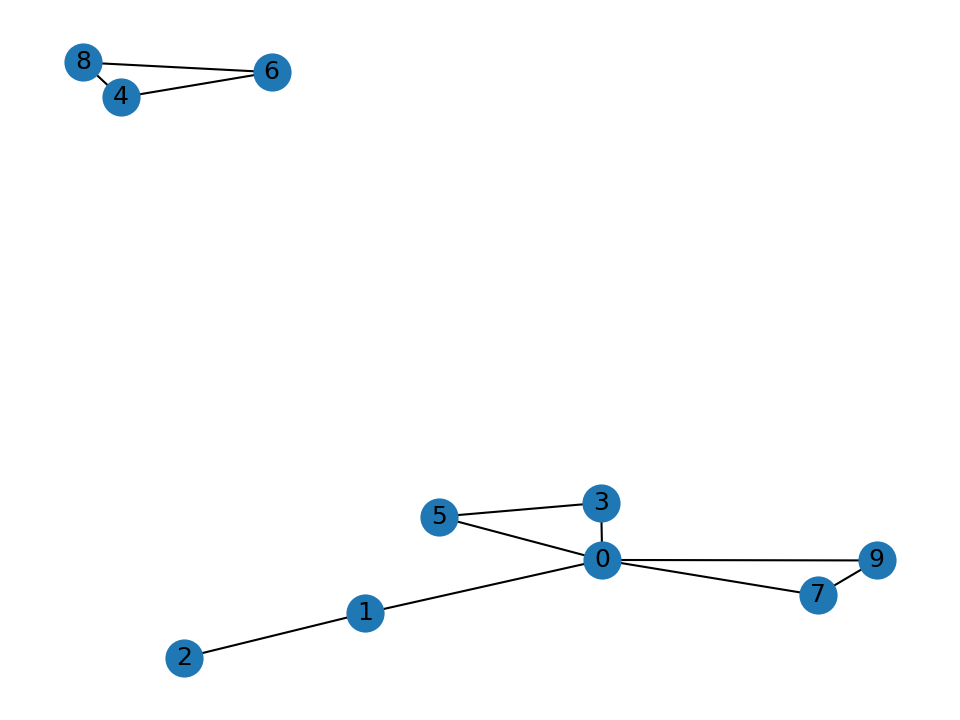

In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

G=nx.Graph()
G.add_nodes_from(np.arange(0,10))
G.add_edges_from([(0,1),(0,3),(0,5),(0,7),(0,9),(1,2),(7,9),(5,3),(4,6),(6,8),(8,4)])
nx.draw(G,with_labels = True)

## Important Networkx tools
The first thing that will be necessary is to access the neighbors of a specified vertex

In [2]:
neighbors = list(G.neighbors(0))
print(neighbors)

[1, 3, 5, 7, 9]


We also will want to be able to get the connected components of the graph 

<IPython.core.display.Javascript object>


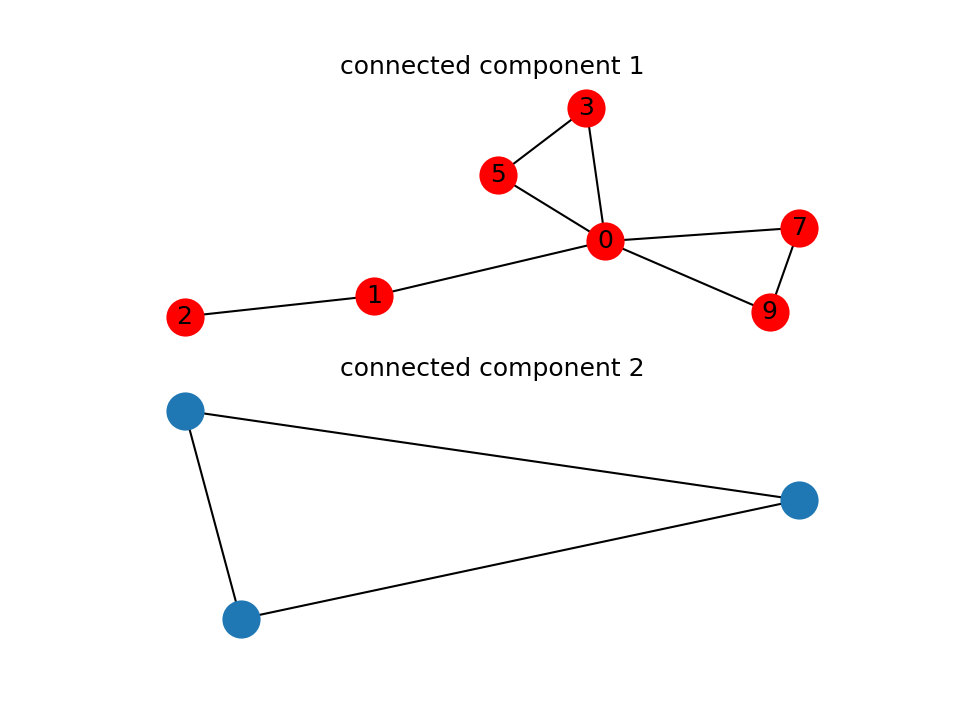

In [34]:
comps = [G.subgraph(c).copy() for c in nx.connected_components(G)]

plt.figure()
plt.subplot(2,1,1)
plt.title("connected component 1")
nx.draw(comps[0],node_color = 'r',with_labels=True)
plt.subplot(2,1,2)
plt.title("connected component 2")
nx.draw(comps[1])
plt.show()

## Generating Graphs
There are many well known graphs which can be immediately generated using 
networkx. For instance, $K_n, K_{n,m}$ and path graphs

<IPython.core.display.Javascript object>


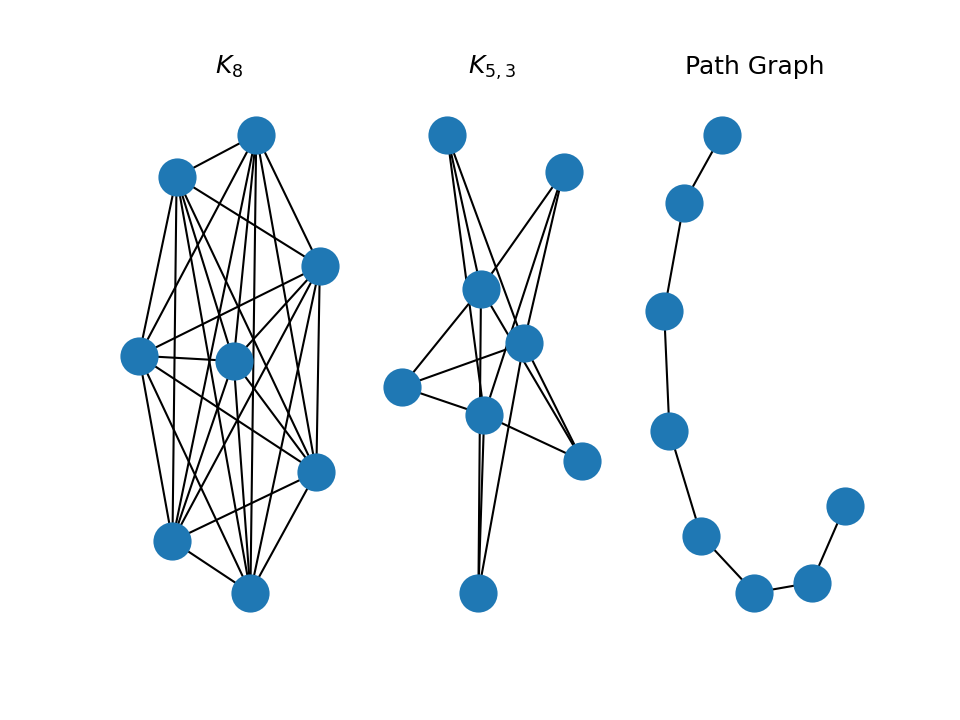

In [4]:
G1=nx.complete_graph(8)
G2=nx.complete_bipartite_graph(5,3)
G3=nx.path_graph(8)


plt.figure()
plt.subplot(1,3,1)
plt.title("$K_8$")
nx.draw(G1)
plt.subplot(1,3,2)
plt.title("$K_{5,3}$")
nx.draw(G2)
plt.subplot(1,3,3)
plt.title("Path Graph")
nx.draw(G3)
plt.show()


In [5]:
print(G2.nodes())


[0, 1, 2, 3, 4, 5, 6, 7]


## Random graphs
There are lots of ways to generate random graphs. Here are some very important ones:

### Erdós Rényi Graphs
Given an integer $n$ and a real number  $0\leq p \leq 1$ we generate a graph on $n$ vertices where each pair of vertices is given an edges with probability $p$

<IPython.core.display.Javascript object>


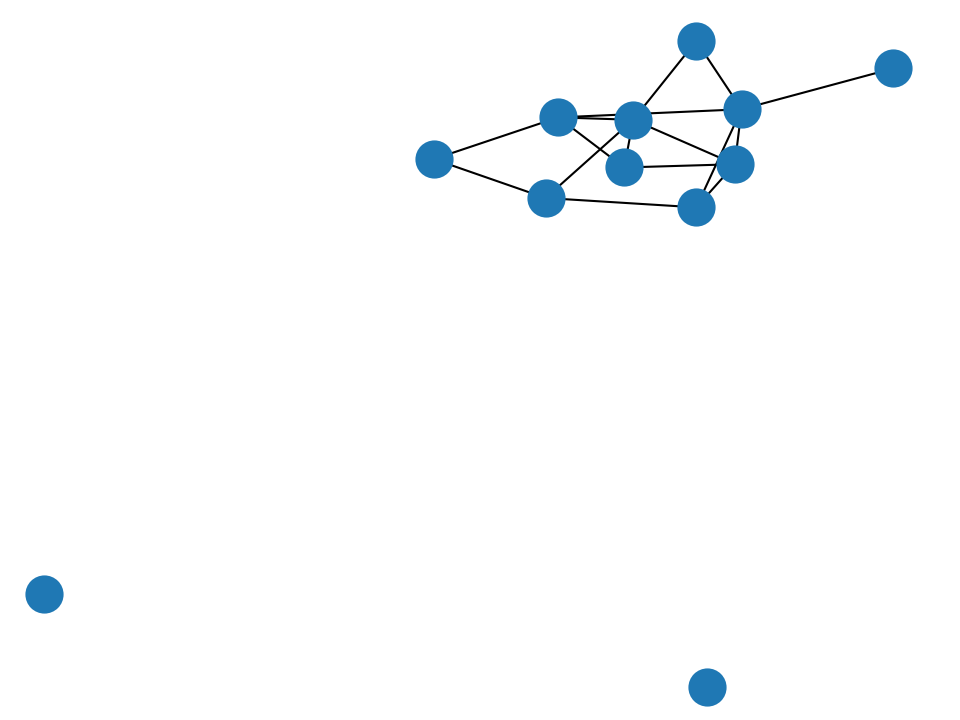

In [6]:
G = nx.erdos_renyi_graph(12,0.2)
plt.figure()
nx.draw(G)

Rerun that code block a couple times to see how the graph is randomly generated.

### Watts Strogatz Graph
The Watts Strogatz graph starts with a cyclic graph on $n$ vertices, then connects each vertex to its k nearest neighbors, then alters each edge with probability $p$. 

<IPython.core.display.Javascript object>


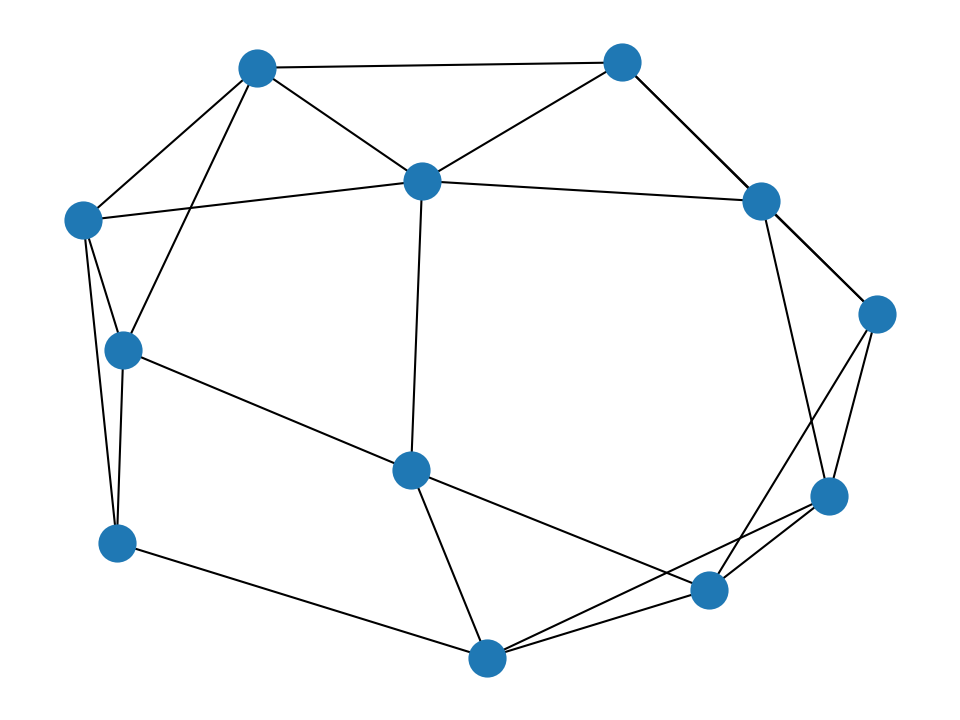

In [10]:
G= nx.watts_strogatz_graph(12,4,0.1)
plt.figure()
nx.draw(G)

Change the $p$ parameter to see the original ring structure of the graph

There are also variations of the Watts Strogatz Graph like the Newman Watts Strogatz graph which only adds edges to the ring or the Watts Strogatz Connected Graph which unsuprisingly ensures that the Watts Strogatz algorithm results in a connected graph

<IPython.core.display.Javascript object>


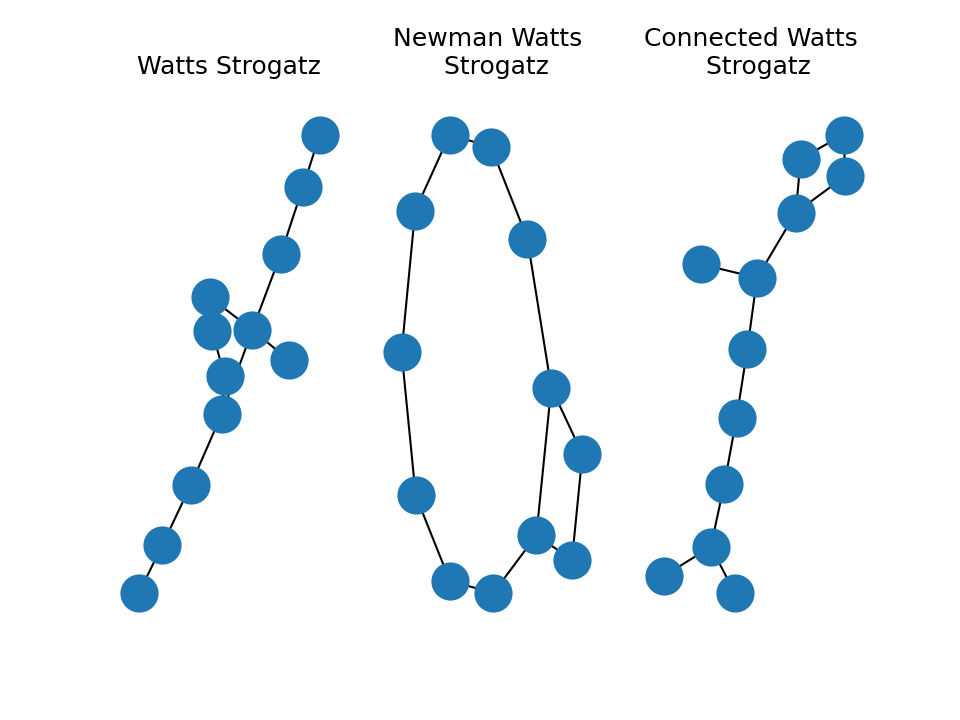

In [11]:
G1=nx.watts_strogatz_graph(12,2,0.2)
G2=nx.newman_watts_strogatz_graph(12,2,0.2)
G3=nx.connected_watts_strogatz_graph(12,2,0.2)


plt.figure()
plt.subplot(1,3,1)
plt.title("Watts Strogatz")
nx.draw(G1)
plt.subplot(1,3,2)
plt.title("Newman Watts \n Strogatz")
nx.draw(G2)
plt.subplot(1,3,3)
plt.title("Connected Watts \n Strogatz")
nx.draw(G3)
plt.show()

### Random Regular Graphs
There are close to 100 graph generators in the networkx library, the last one I'll mention generates a $d$ regular graph (which is a graph wherein every vertex has dergree $d$. 

<IPython.core.display.Javascript object>


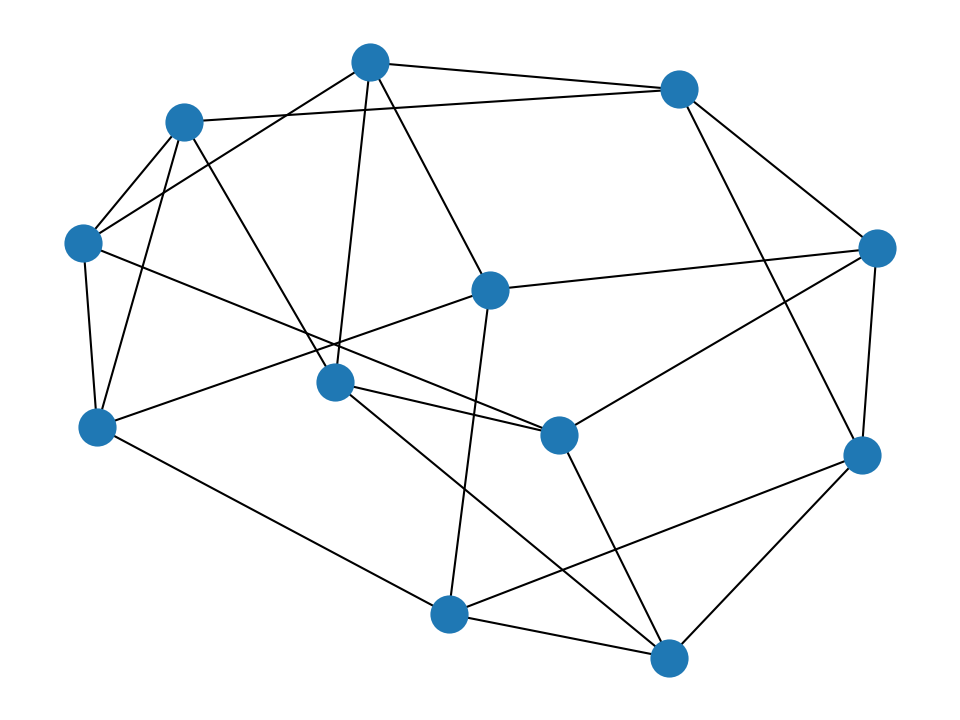

In [12]:
G= nx.random_regular_graph(4,12)
plt.figure()
nx.draw(G)

In [14]:
print(G.nodes())

[3, 7, 0, 2, 8, 9, 5, 10, 11, 1, 6, 4]


## A Graph Theoretical Dynamical System

Consider a connected graph $G(V,E)$ and a graph coloring of $G$, Suppose that every vertex "wants" to be the same color as the plurality of its neighbors. (Every vertex wants to conform to the majority of its associates). For any graph coloring, we can calculate the color that would have acheived this for each vertex (which two a game theorist would be the best resposne). If we color the graph using the best response coloring, we can do this process again and again leaving us with a sequence of colorings. 

<IPython.core.display.Javascript object>


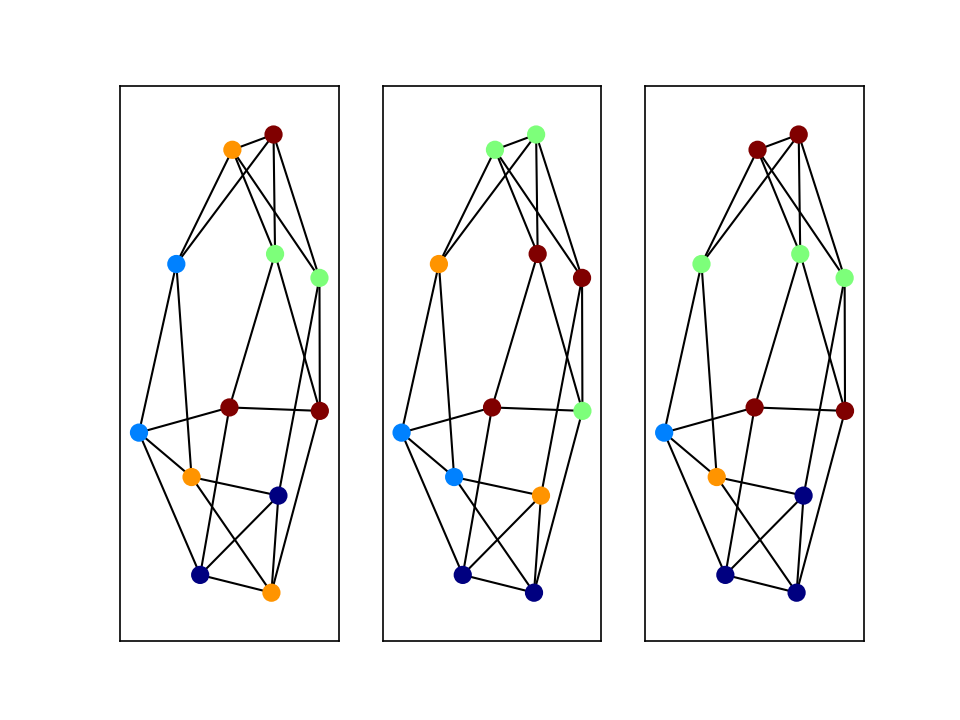

In [15]:
import orbit
import GTDS_equilibria
import random

G = nx.random_regular_graph(4,12)
myOrbit = orbit.Orbit(G,[random.randint(0,4) for i in range(len(G.nodes))])
myOrbit.draw(frames = (0,1,2),node_size=60)

Above you see how each vertex updates its color. This updating rule gives us something like a dynamical system. We can investigate equilibria and stability of this system. For instance. If we continue this update process we well (likely) find an equilibrium (pictured below)

<IPython.core.display.Javascript object>


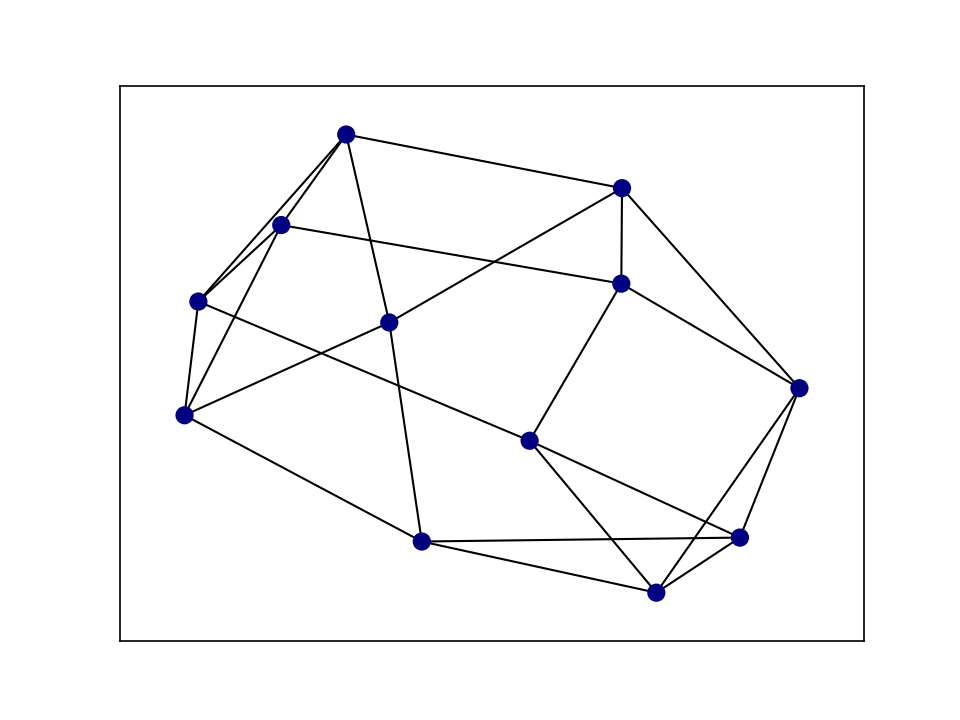

In [16]:
myOrbit.draw(node_size=60)

### the Orbit Class
To study this system, I wrote a class called Orbit. The main thing to know about Orbit is that it is initialized with a graph and an initial coloring and, in its initialization, it solves the IVP of the GTDS.

To see more about the Orbit class you can examine the docstring

In [17]:
print(help(orbit.Orbit))

Help on class Orbit in module orbit:

class Orbit(builtins.object)
 |  Orbit(G, y0=None, iter_limit=5000)
 |  
 |  A solution to the IVP for the GTDS
 |  
 |  
 |  Attributes
 |  ----------
 |      graph : nx.Graph
 |          the graph on which the IVP is solved 
 |      size : int
 |          The number of nodes in graph
 |      solution : list 
 |          a sequence of colorings, colors are represented as integers
 |      iter : int
 |          The length of the solution
 |      eq : bool
 |          True if the solution ends in an equilibrium
 |      cycle2 : bool
 |          True if the solution ends in a two-cycle
 |      cycle3 : bool
 |          True if the solution ends in a three-cycle
 |      report : str
 |          A string which describes the solution and its limit. 
 |  Methods
 |  ---------
 |      draw(n=1, dim=None)
 |          Shows a figure with the final n steps of orbit colored on the graph
 |      get_limit()
 |          Returns the last coloring in the orbit it

The main idea is that we can solve the IVP of this GTDS which is super helpful for making observations.

<IPython.core.display.Javascript object>


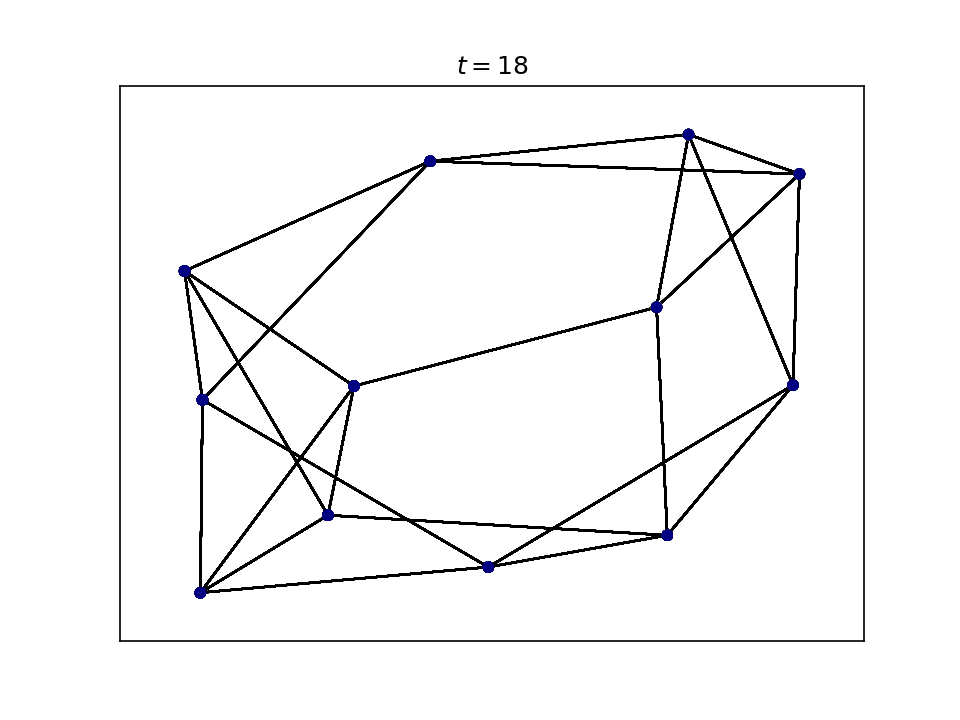

In [18]:
myOrbit.animation()

<IPython.core.display.Javascript object>


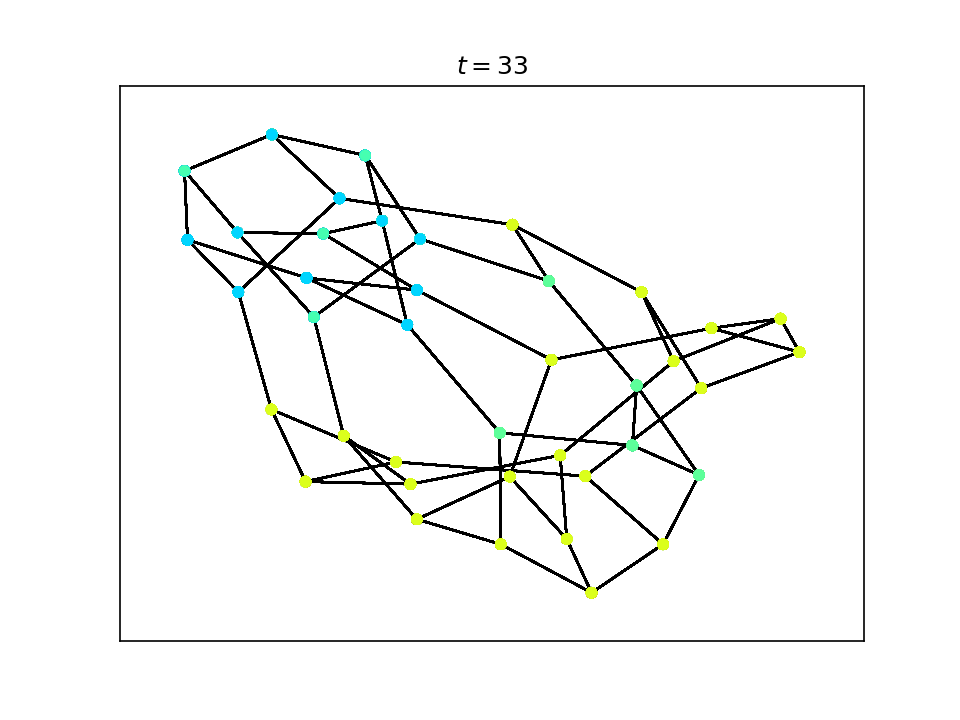

In [19]:
myNewOrbit = orbit.Orbit(nx.random_regular_graph(3,40))
myNewOrbit.animation()

Some times these orbits can end in equilibria, sometimes they end in two cycles. Just generating orbits and observing them like this can be exceptionally helpful. 

For instance having done this project we conjecture that 3-cycles may be impossible. 

I wrote a function "gen_connected_graph()" to generate a random graph using the Erdos-Renyi algorithm but then connect all the connected components.

<IPython.core.display.Javascript object>


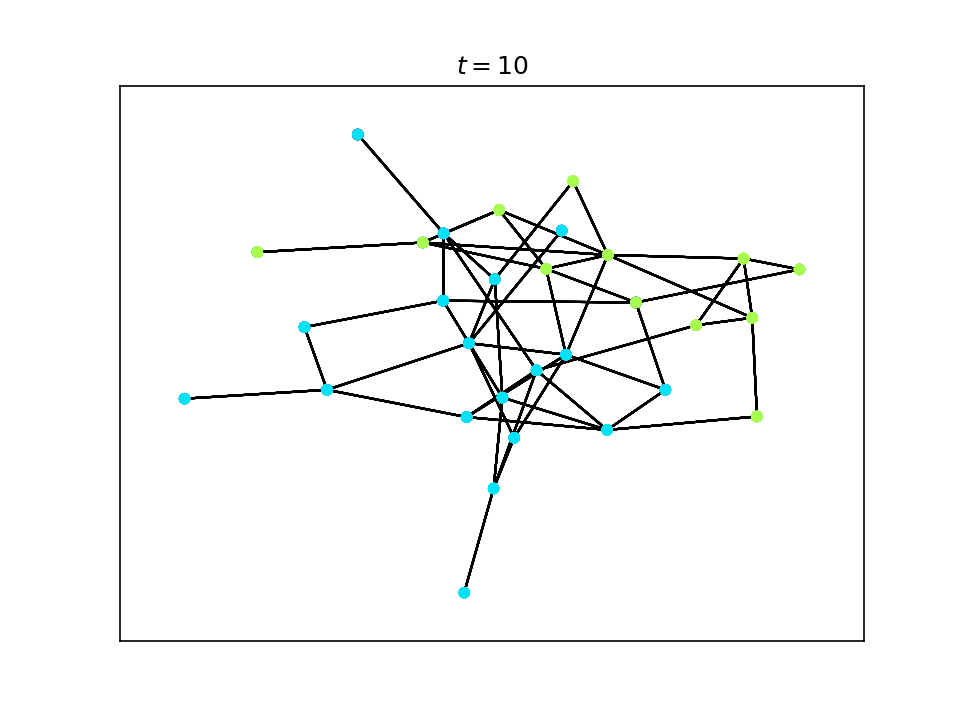

In [25]:
myThirdOrbit=orbit.Orbit(GTDS_equilibria.gen_connected_graph(30,0.1))
myThirdOrbit.animation()

<IPython.core.display.Javascript object>


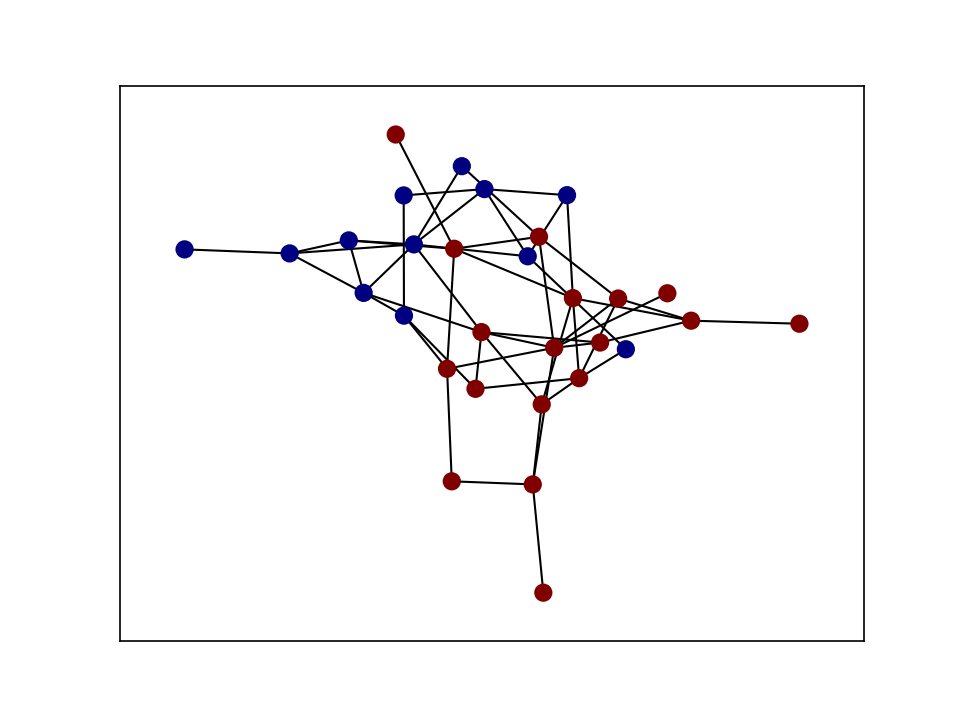

In [26]:
if(myThirdOrbit.eq):
    myThirdOrbit.draw(node_size=60)
else:
    myThirdOrbit.draw(frames=(-2,-1),node_size=60)

### Cliques Analysis 

Although direct is helpful, it of course is not our only tool for analysis. The main tool we are focusing on now is "clique analysis"
A Clique is a connected subgraph in an equilibrium coloring in which all vertices have the same color. 

Given an orbit, we want to be able to extact the cliques as subgraphs so we can measure them



In [27]:
cliques = GTDS_equilibria.find_cliques(myThirdOrbit)
print("This orbit ends in a limit with {} cliques".format(len(cliques)))

This orbit ends in a limit with 2 cliques


<IPython.core.display.Javascript object>


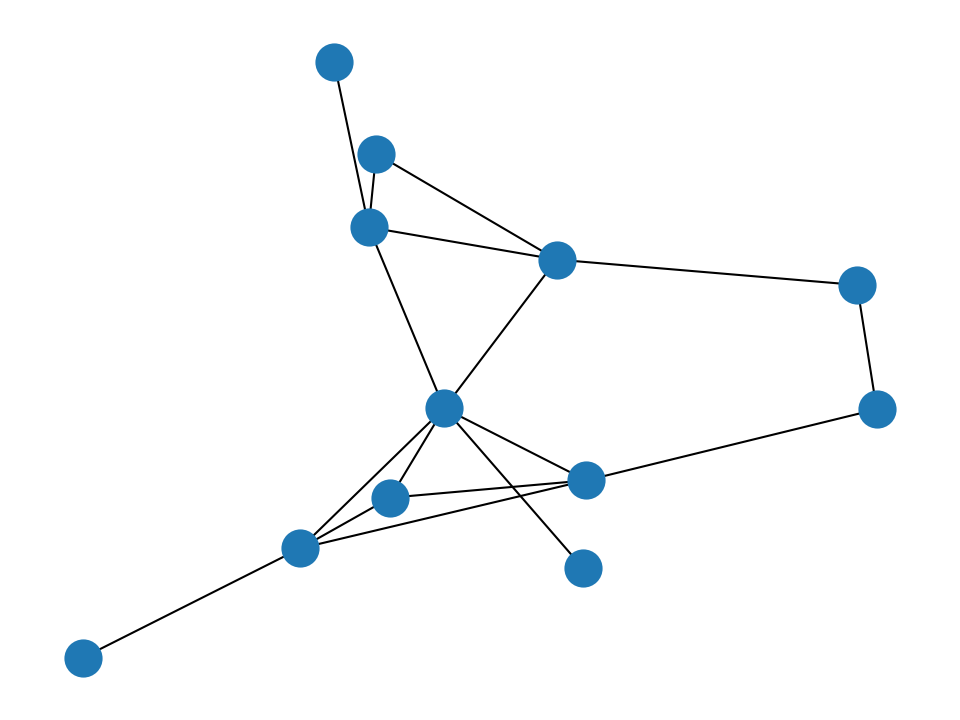

In [28]:
plt.figure()
nx.draw(cliques[0])
plt.show()

<IPython.core.display.Javascript object>


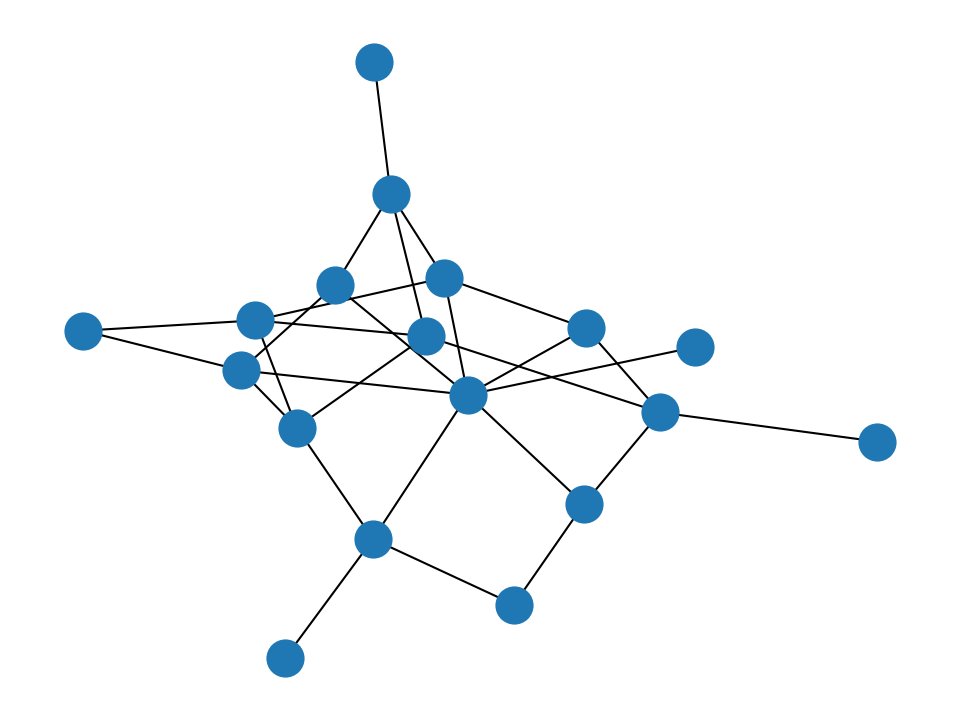

In [29]:
plt.figure()
nx.draw(cliques[1])
plt.show()

### Further Questions

with these tools we are ready to atart trying to answer a great many questions:
- Can we classify all the graph which only admit the trivial equilibrium?
- Can we enumerate all the equilibria for a particular graph? (Probably a $n^n$ process)
- Can we give some upper or lower bounds for the size of connectors or separators between two cliques?
- Can we classify all equilibria for well understood graphs like $K_n, K_{n,m}$ and others? (yes)
- Can we Derive a stability condition for equilibrium colorings?
- Can we design a graph with a heteroclinic orbit?
- Can we formulate this as a boundary value problem?